In [33]:
import pandas as pd
df = pd.read_csv("../datasets/CarsData.csv/CarsData.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fuelType      97712 non-null  object 
 6   tax           97712 non-null  int64  
 7   mpg           97712 non-null  float64
 8   engineSize    97712 non-null  float64
 9   Manufacturer  97712 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.5+ MB


In [35]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000
mean,2017.066502,16773.487555,23219.475499,120.142408,55.205623,1.664913
std,2.118661,9868.552222,21060.882301,63.357250,16.181659,0.558574
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,9999.000000,7673.000000,125.000000,47.100000,1.200000
50%,2017.000000,14470.000000,17682.500000,145.000000,54.300000,1.600000
75%,2019.000000,20750.000000,32500.000000,145.000000,62.800000,2.000000
max,2024.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


In [36]:
df.shape

(97712, 10)

In [37]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Manufacturer    0
dtype: int64

In [38]:
import matplotlib.pyplot as plt, seaborn as sns

In [39]:
from scipy import stats

In [40]:
# import numpy as np
# z_scores = np.abs(stats.zscore(df))
# thresholod = 3
# df = df[z_scores<thresholod]
# df.shape

C:\Users\Muhammad Umer Khan\AppData\Local\Temp\ipykernel_14120\444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

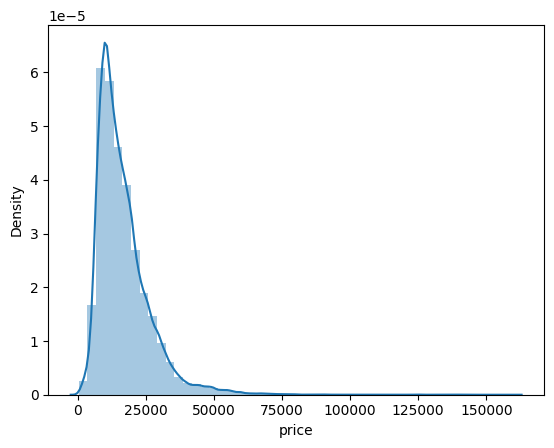

In [41]:
sns.distplot(df['price'])

<Axes: xlabel='fuelType'>

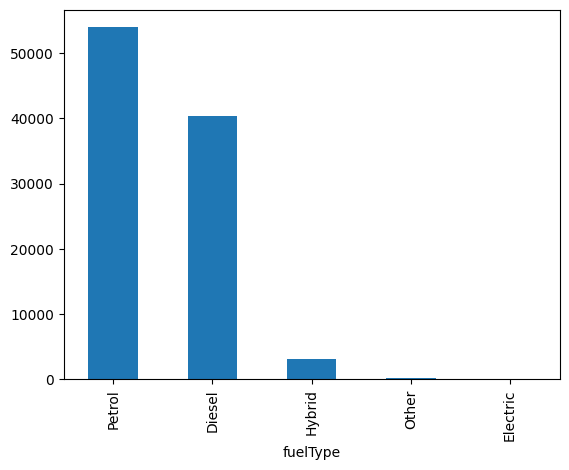

In [42]:
df['fuelType'].value_counts().plot(kind='bar')

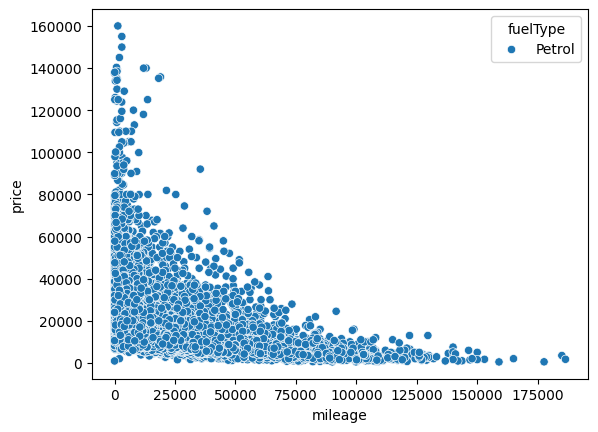

In [43]:
sns.scatterplot(x = df["mileage"], y = df["price"], hue = df[df["fuelType"] == "Petrol"]["fuelType"])
plt.show()

In [44]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fuelType      97712 non-null  object 
 6   tax           97712 non-null  int64  
 7   mpg           97712 non-null  float64
 8   engineSize    97712 non-null  float64
 9   Manufacturer  97712 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.5+ MB


In [46]:
le_col = df[['model', 'transmission', 'fuelType', 'Manufacturer']]
for label in le_col:
    df[label] = le.fit_transform(df[label])
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,81,2017,7495,1,11630,4,145,60.1,1.0,3
1,115,2017,10989,1,9200,4,145,58.9,1.0,8
2,1,2019,27990,3,1614,0,145,49.6,2.0,1
3,184,2017,12495,1,30960,0,150,62.8,2.0,5
4,60,2017,7999,1,19353,4,125,54.3,1.2,2
...,...,...,...,...,...,...,...,...,...,...
97707,60,2017,10447,0,8337,4,145,54.3,1.0,2
97708,2,2014,14995,1,25372,0,30,61.4,2.0,1
97709,60,2017,8950,1,19910,4,125,54.3,1.2,2
97710,25,2017,10700,0,24468,4,125,50.4,1.4,7


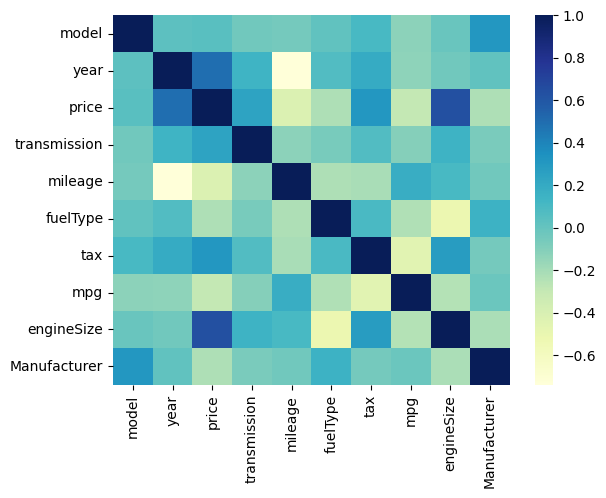

In [47]:
df_corr = df.corr()
sns.heatmap(df_corr, fmt = ".3f", cmap = "YlGnBu")
plt.show()

In [48]:
from scipy.stats.mstats import normaltest
normaltest(df['price'].values)

NormaltestResult(statistic=53679.13673475452, pvalue=0.0)

<Axes: >

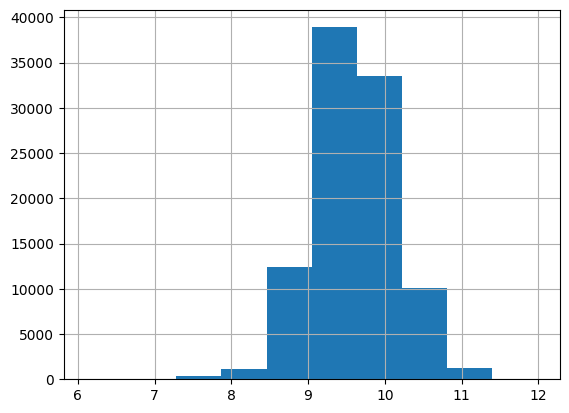

In [49]:
log_medv = np.log(df['price'])
log_medv.hist()

In [50]:
normaltest(log_medv)

NormaltestResult(statistic=1512.2308905378118, pvalue=0.0)

In [51]:
def plot_square_normal_data():
    df = np.square(np.random.normal(loc=5, size=1000))
    plt.hist(df)
    plt.show()
    return df

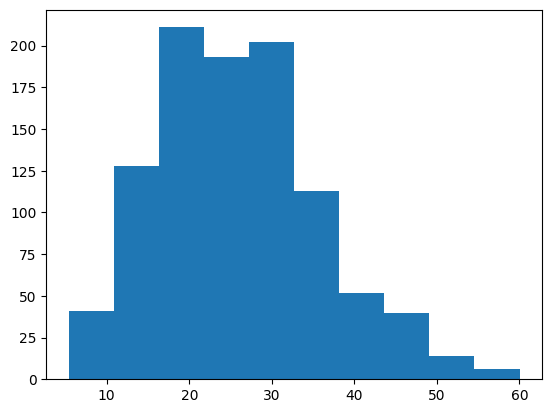

In [52]:
data = plot_square_normal_data()

# Preprocessing

Column : model


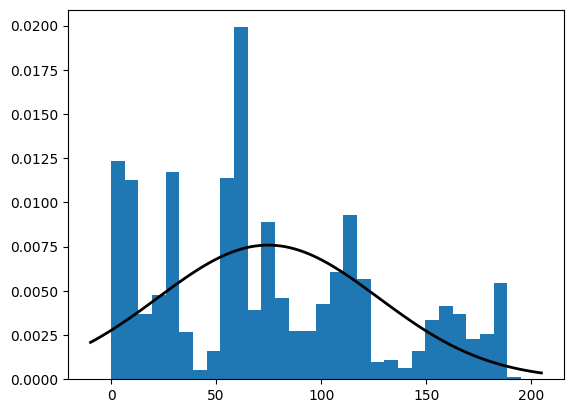

C:\Users\Muhammad Umer Khan\AppData\Local\Temp\ipykernel_14120\2207012276.py:12: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 97712.
  stat, p = shapiro(df[col])


Statistics = 0.942, p = 0.000
Data does not look Gaussian Distribution(reject H0) 

Column : year


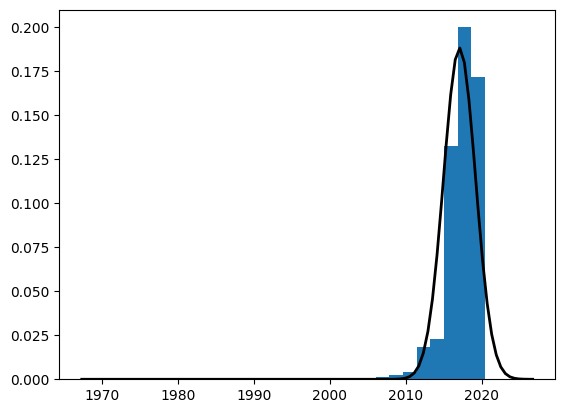

Statistics = 0.851, p = 0.000
Data does not look Gaussian Distribution(reject H0) 

Column : price


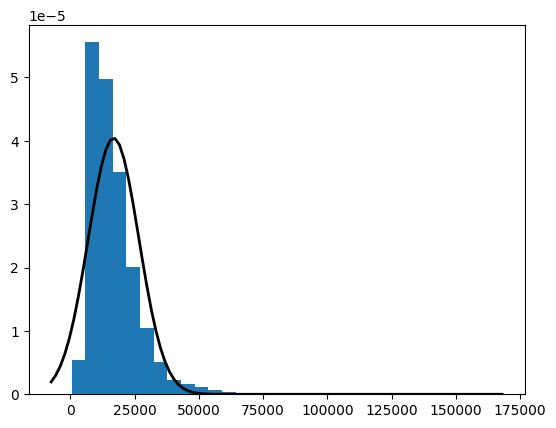

Statistics = 0.835, p = 0.000
Data does not look Gaussian Distribution(reject H0) 

Column : transmission


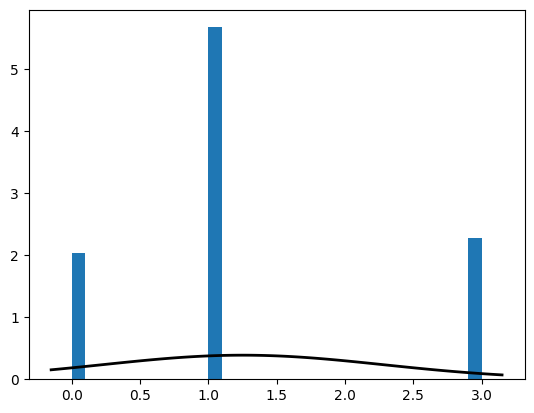

Statistics = 0.749, p = 0.000
Data does not look Gaussian Distribution(reject H0) 

Column : mileage


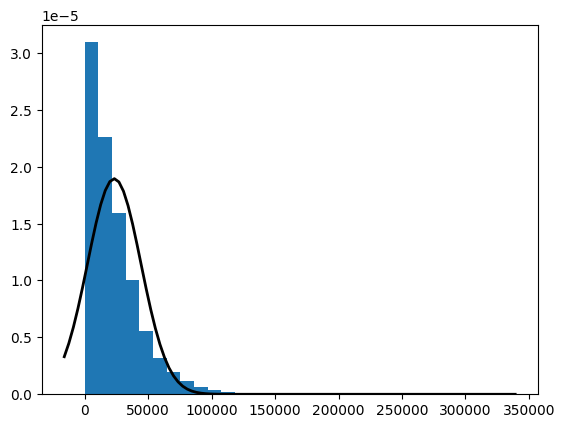

Statistics = 0.855, p = 0.000
Data does not look Gaussian Distribution(reject H0) 

Column : fuelType


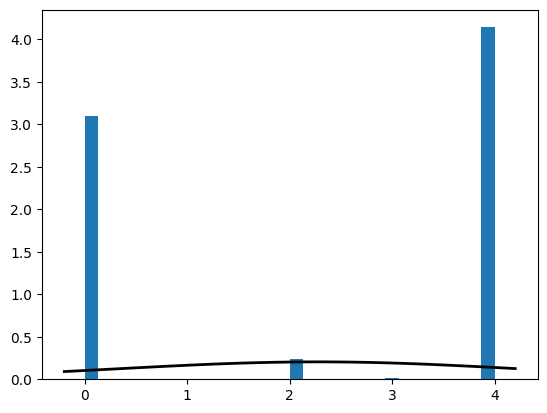

Statistics = 0.650, p = 0.000
Data does not look Gaussian Distribution(reject H0) 

Column : tax


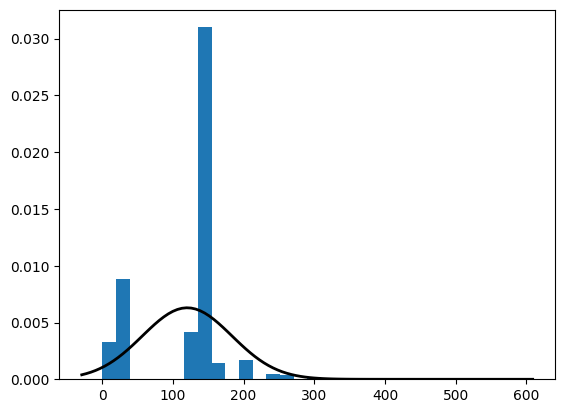

Statistics = 0.741, p = 0.000
Data does not look Gaussian Distribution(reject H0) 

Column : mpg


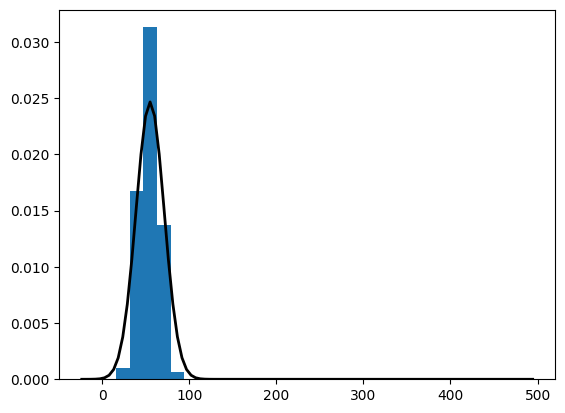

Statistics = 0.666, p = 0.000
Data does not look Gaussian Distribution(reject H0) 

Column : engineSize


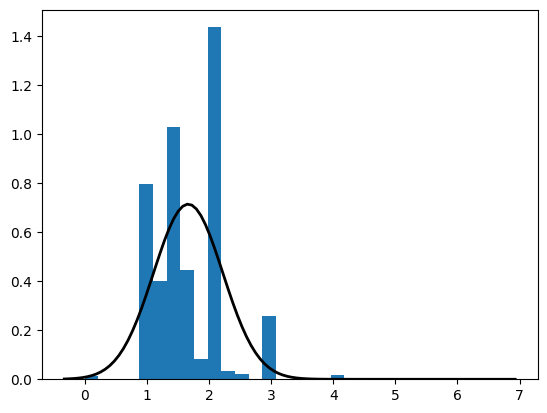

Statistics = 0.872, p = 0.000
Data does not look Gaussian Distribution(reject H0) 



In [59]:
from scipy.stats import shapiro
for col in df.columns[:-1]:
    print(f"Column : {col}")
    plt.hist(df[col], density = True, bins = 30)
    
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, np.mean(df[col]), np.std(df[col]))
    plt.plot(x, p, 'k', linewidth = 2)
    plt.show()
    
    stat, p = shapiro(df[col])
    print("Statistics = %.3f, p = %.3f" %(stat, p))
    
    alpha = 0.05
    if p > alpha:
        print("Data looks Gaussian Distribution(fail to reject H0) \n")
    else:
        print("Data does not look Gaussian Distribution(reject H0) \n")

In [60]:
for col in df.columns[:-1]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= (Q1 - 1.5*IQR)) & (df[col] <= (Q3 + 1.5*IQR))]
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,81,2017,7495,1,11630,4,145,60.1,1.0,3
1,115,2017,10989,1,9200,4,145,58.9,1.0,8
3,184,2017,12495,1,30960,0,150,62.8,2.0,5
4,60,2017,7999,1,19353,4,125,54.3,1.2,2
6,99,2019,17990,1,7038,4,145,34.4,1.5,2
...,...,...,...,...,...,...,...,...,...,...
97705,99,2017,14795,1,25570,0,150,60.1,2.0,2
97706,75,2015,17998,1,46294,4,200,39.8,2.0,8
97708,2,2014,14995,1,25372,0,30,61.4,2.0,1
97709,60,2017,8950,1,19910,4,125,54.3,1.2,2


In [61]:
X = df.drop(columns='price')
y = df['price']

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [63]:
def accuracy(X_train, X_test, y_train, y_test):
    reg = LogisticRegression()
    reg.fit(X_train, y_train)
    y_reg = reg.predict(X_test)
    
    svc = SVC()
    svc.fit(X_train, y_train)
    y_svc = svc.predict(X_test)
    
    rfc = RandomForestClassifier()
    rfc.fit(X_train, y_train)
    y_rfc = rfc.predict(X_test)
    
    gbc = GradientBoostingClassifier()
    gbc.fit(X_train, y_train)
    y_gbc = gbc.predict(X_test)
    
    abc = AdaBoostClassifier()
    abc.fit(X_train, y_train)
    y_abc = abc.predict(X_test)
    
    knc = KNeighborsClassifier()
    knc.fit(X_train, y_train)
    y_knc = knc.predict(X_test)
    
    return accuracy_score(y_test, y_reg), accuracy_score(y_test, y_svc), accuracy_score(y_test, y_rfc), accuracy_score(y_test, y_gbc), accuracy_score(y_test, y_abc), accuracy_score(y_test, y_knc)

In [64]:
scores = pd.DataFrame(columns = ["REG", "SVC", "RFC", "GBC", "ABC", "KNC"],
                     index = ["ACC"])

In [66]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
acc = [reg, svc, rfc, gbc, abc, knc] = accuracy(X_train, X_test, y_train, y_test)

In [ ]:
scores.iloc[0, :] = acc
scores

In [ ]:
train_scores = []
test_scores = []
for i in range(1, 10):
    rfc = RandomForestClassifier(n_estimators = i, max_depth = i+1, min_samples_split = i+1)
    rfc.fit(X_train, y_train)
    
    train_scores.append(rfc.score(X_train, y_train))
    test_scores.append(rfc.score(X_test, y_test))
sns.lineplot(train_scores, marker = '*', color = 'b')
sns.lineplot(test_scores, marker = 'o', color = 'r')

In [ ]:
rfc = RandomForestClassifier(n_estimators = 2, max_depth = 3, min_samples_split = 3)
rfc.fit(X_train, y_train)
print("RFC Train Model Score :", rfc.score(X_train, y_train))
print("RFC Test Model Score :", rfc.score(X_test, y_test))